# Time Series Analysis

### Libraries

In [84]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

### Data

In [2]:
def load_filtered_data(city):
    '''
    Load filtered data from a city
    '''
    file = ['business', 'checkin', 'review', 'tip', 'user']
    data = {}
    for f in file:
        data[f] = pd.read_csv(f'../filtered_cities/{city}_{f}.csv')
    return data

In [5]:
# load data

city = 'St. Louis'
data = load_filtered_data(city)

#### Reviews

In [6]:
# review data

data['review'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63451 entries, 0 to 63450
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    63451 non-null  object
 1   user_id      63451 non-null  object
 2   business_id  63451 non-null  object
 3   stars        63451 non-null  int64 
 4   useful       63451 non-null  int64 
 5   funny        63451 non-null  int64 
 6   cool         63451 non-null  int64 
 7   text         63451 non-null  object
 8   date         63451 non-null  object
dtypes: int64(4), object(5)
memory usage: 4.4+ MB


In [12]:
# time series for reviews

review_ts = data['review'][['business_id', 'date']].copy()
review_ts['date'] = pd.to_datetime(review_ts['date'])
review_ts.set_index('date', inplace=True)

review_ts

,business_id
date,
2011-01-08 23:52:22,XMGjDIAFbu9VSmWDs-Ev5w
2018-06-09 01:37:02,0z45rM2paE-O-6w63GEi6g
2010-03-13 22:33:10,-bGw8ARHQucKWEHEkxpGFw
2017-12-16 03:11:50,w6z28easvQLND722s4pNvw
2015-04-28 20:29:40,Z2ltNYVxmLaLGNVB7yFWQA
...,...
2014-08-16 02:47:47,dHS3dwYAGIya7yd1d3J1DA
2021-12-20 11:58:50,jJKmOo4aeo_NanXQn1gjiw
2019-10-04 21:57:19,yVZtL5MmrpiivyCIrVkGgA


In [26]:
# reviews per day, week, month, year

reviews_per_day = review_ts.resample('D').size()
reviews_per_week = review_ts.resample('W').size()
reviews_per_month = review_ts.resample('ME').size()
reviews_per_year = review_ts.resample('YE').size()

#### Checkins

In [14]:
# checkin data

data['checkin'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088 entries, 0 to 1087
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  1088 non-null   object
 1   date         1088 non-null   object
dtypes: object(2)
memory usage: 17.1+ KB


In [21]:
# time series for checkins

checkin_ts = data['checkin'].copy()
checkin_ts = checkin_ts.explode('date')
checkin_ts['date'] = pd.to_datetime(checkin_ts['date'])
checkin_ts.set_index('date', inplace=True)

checkin_ts

,business_id
date,
2014-10-17 18:14:34,-1m7-ZxGRVRdKa4tFB4eDg
2014-10-29 17:01:04,-1m7-ZxGRVRdKa4tFB4eDg
2014-10-29 17:51:48,-1m7-ZxGRVRdKa4tFB4eDg
2015-03-17 12:35:17,-1m7-ZxGRVRdKa4tFB4eDg
2015-04-14 17:46:26,-1m7-ZxGRVRdKa4tFB4eDg
...,...
2020-01-30 19:40:21,zziDpuuJw-Km1J4BaGpBKA
2020-12-21 22:29:50,zziDpuuJw-Km1J4BaGpBKA
2021-07-10 18:14:38,zziDpuuJw-Km1J4BaGpBKA


In [27]:
# checkins per day, week, month, year

checkins_per_day = checkin_ts.resample('D').size()
checkins_per_week = checkin_ts.resample('W').size()
checkins_per_month = checkin_ts.resample('ME').size()
checkins_per_year = checkin_ts.resample('YE').size()

### Visualization

In [135]:
def time_series_plot(df_per_day, df_per_week, df_per_month, df_per_year, content='Reviews'):
    '''
    Plot time series data with subplots
    '''
    fig, axs = plt.subplots(2, 2, figsize=(12, 6))
    color = 'blue' if content == 'Reviews' else 'orange'
    
    axs[0, 0].plot(df_per_day, color=color)
    axs[0, 0].set_title(f'{content} per Day')
    axs[0, 0].set_ylabel(f'Number of {content}')

    axs[0, 1].plot(df_per_week, color=color)
    axs[0, 1].set_title(f'{content} per Week')
    axs[0, 1].set_ylabel(f'Number of {content}')
    
    axs[1, 0].plot(df_per_month, color=color)
    axs[1, 0].set_title(f'{content} per Month')
    axs[1, 0].set_ylabel(f'Number of {content}')
    
    axs[1, 1].plot(df_per_year, color=color)
    axs[1, 1].set_title(f'{content} per Year')
    axs[1, 1].set_ylabel(f'Number of {content}')
    
    plt.tight_layout()
    plt.show()

#### Reviews

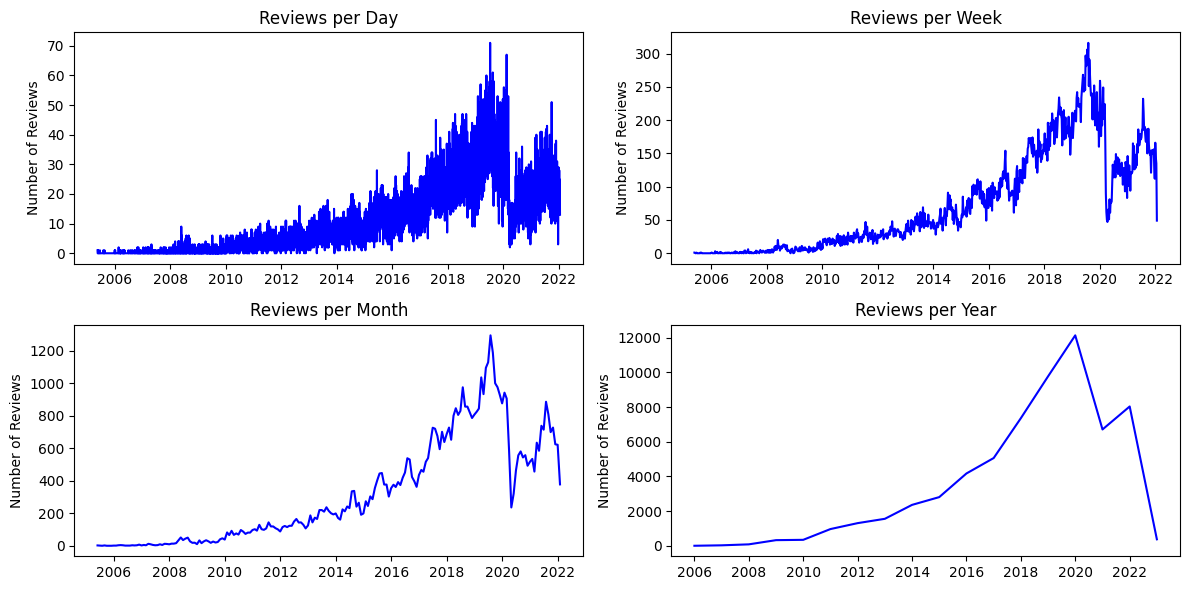

In [136]:
# time series plot for reviews

time_series_plot(reviews_per_day, reviews_per_week, reviews_per_month, reviews_per_year, content='Reviews')

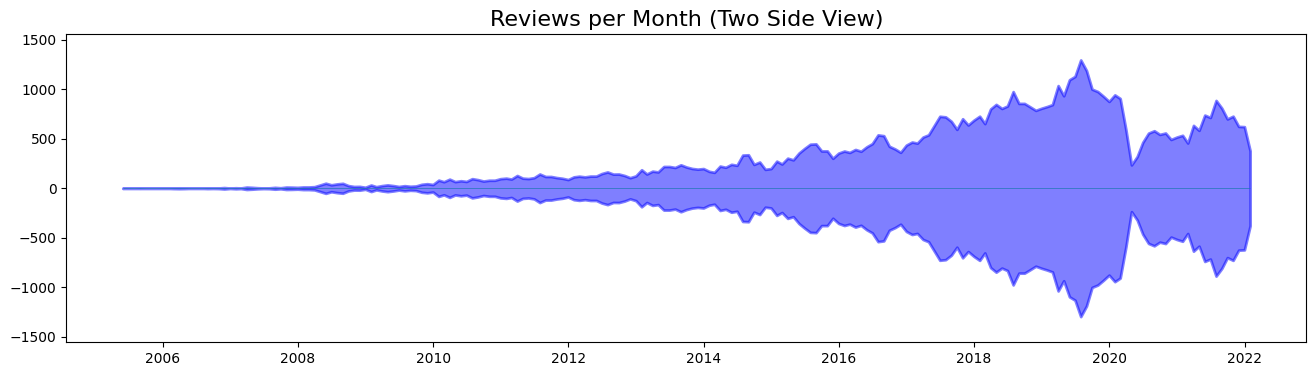

In [138]:
# plot to emphasize growth in reviews

x = reviews_per_month.index
y1 = reviews_per_month.values

plt.figure(figsize=(16, 4))
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='blue')

margin = 0.2 * max(y1)
lower_limit = -max(y1) - margin
upper_limit = max(y1) + margin
plt.ylim(lower_limit, upper_limit)

plt.title('Reviews per Month (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=x.min(), xmax=x.max(), linewidth=.5)
plt.show()

#### Checkins

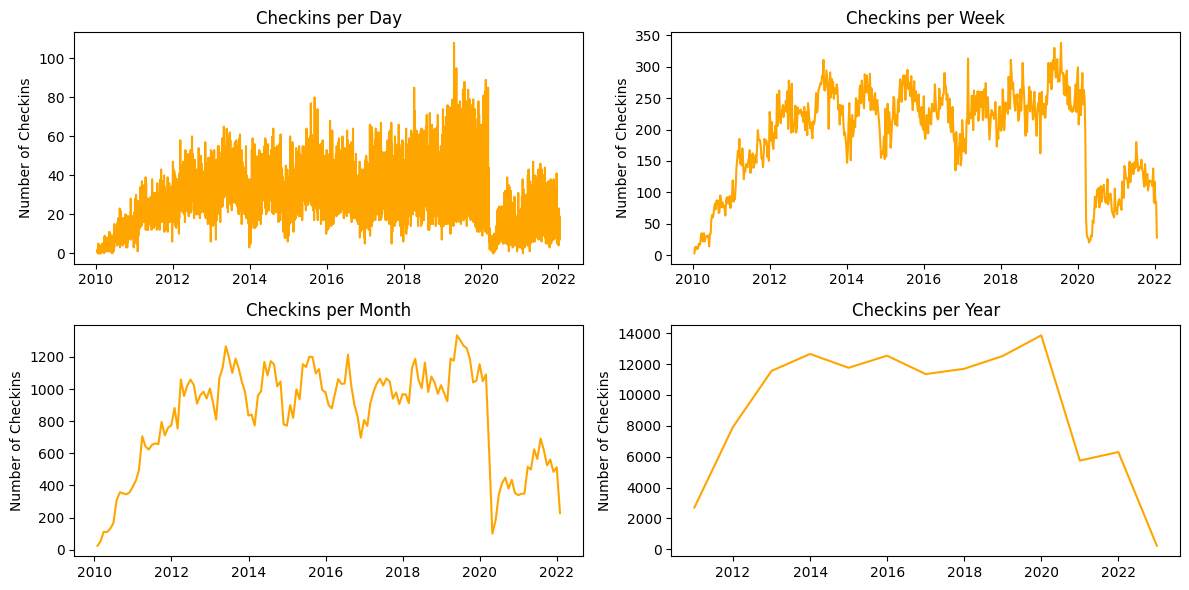

In [129]:
# time series plot for checkins

time_series_plot(checkins_per_day, checkins_per_week, checkins_per_month, checkins_per_year, content='Checkins')

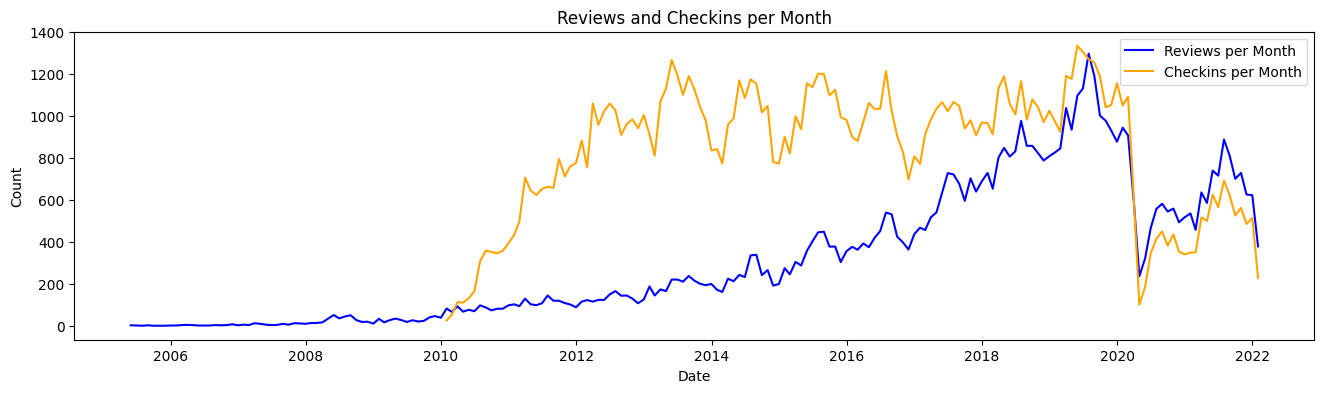

In [134]:
# comparison between reviews and checkins over time

fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(reviews_per_month.index, reviews_per_month.values, color='blue', label='Reviews per Month')
ax.plot(checkins_per_month.index, checkins_per_month.values, color='orange', label='Checkins per Month')
ax.set_title('Reviews and Checkins per Month')
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.legend()
plt.show()

### Decomposition

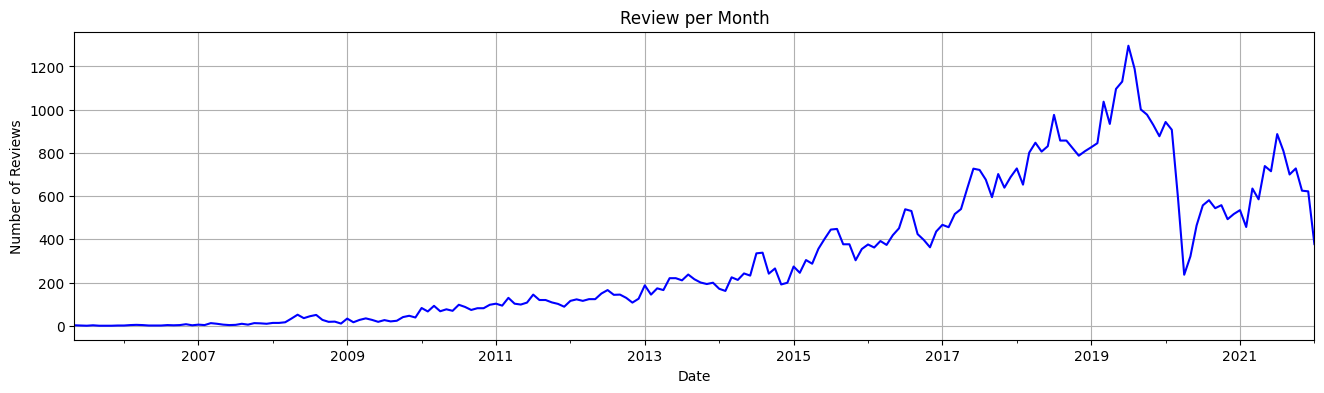

In [133]:
# determine seasonality by visualizing reviews per month

plt.figure(figsize=(16, 4))
reviews_per_month.plot(color='blue')
plt.title('Review per Month')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

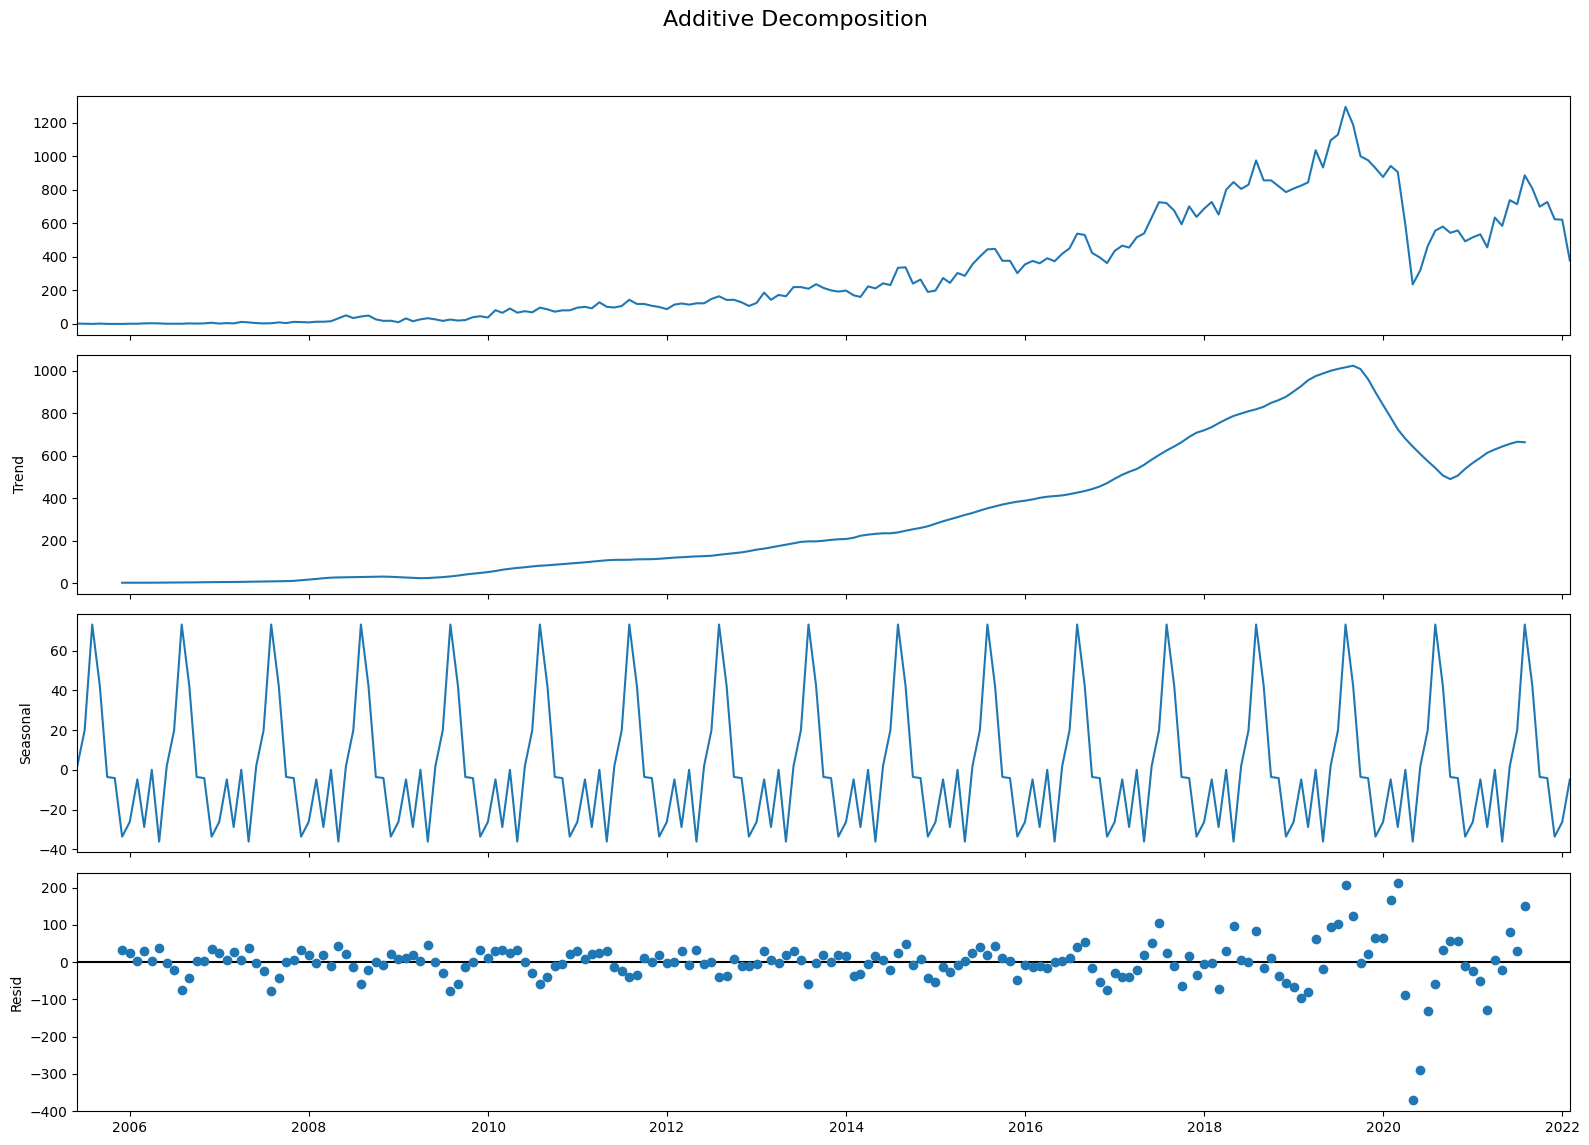

In [132]:
# additive decompositon - deals with zero values

months_per_period = 12 # TODO: determine correct value (if seasonality is even present)
additive_reviews = seasonal_decompose(reviews_per_month, model='additive', period=months_per_period)

plt.rcParams.update({'figure.figsize': (16, 12)})
additive_reviews.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()